In [1]:
import pandas as pd
import re 
from Levenshtein import distance as lev
import urllib.parse

In [2]:
# df = pd.read_csv('word_lists/acter/fr_en.csv', delimiter='\t', header=None)
df = pd.read_csv('heart_failure_fr.csv')

In [3]:
# df=pd.DataFrame(df.values, columns = ["source", "target"])
df = df[['source','target']]

In [4]:
df['target'] = df['target'].apply(lambda x : x.replace('_',' '))

In [5]:
df['source'] = df['source'].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))
df['target'] = df['target'].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))

In [6]:
df['source_words'] = df['source'].str.split().str.len()
df['target_words'] = df['target'].str.split().str.len()

In [7]:
def title_parse(title):
    title = urllib.parse.unquote(title)
    return title
df['source']= df.source.apply(title_parse)
df['target']= df.target.apply(title_parse)

In [8]:
df

,source,target,source_words,target_words
0,Heart failure,Insuffisance cardiaque chez l'humain,2,4
1,Actin,Actine,1,1
2,Heart failure,Insuffisance cardiaque chez l'humain,2,4
3,Chest radiograph,Radiographie du thorax,2,3
4,Tamsulosin,Tamsulosine,1,1
...,...,...,...,...
7026,Cyclopropenylidene,Cyclopropénylidène,1,1
7027,Cilium,Cil cellulaire,1,2
7028,Nickel–cadmium battery,Accumulateur nickel-cadmium,2,2
7029,Mathematical optimization,Optimisation,2,1


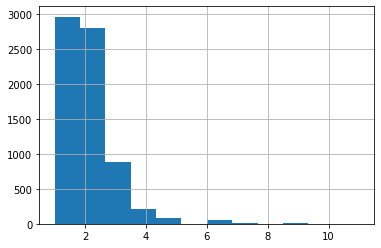

In [9]:
hist = df['source_words'].hist(bins=12)

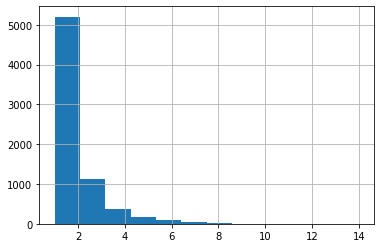

In [10]:
hist = df['target_words'].hist(bins=12)

In [11]:
df['compare'] = df.apply(lambda x : 1 if x['source_words'] == x['target_words'] else 2, axis=1)


In [12]:
df['distance'] = df.apply(lambda x : lev(str(x['source']),str(x['target'])), axis=1)
df['distance'] = df['distance'].apply(lambda x : 20 if x>20 else x)

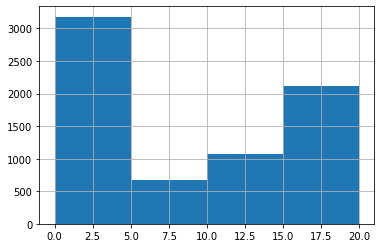

In [13]:
hist = df['distance'].hist(bins=4)

In [14]:
lev(str(df['source_words'][0]),str(df['target_words'][0]))

1

In [15]:
df

,source,target,source_words,target_words,compare,distance
0,Heart failure,Insuffisance cardiaque chez l'humain,2,4,2,20
1,Actin,Actine,1,1,1,1
2,Heart failure,Insuffisance cardiaque chez l'humain,2,4,2,20
3,Chest radiograph,Radiographie du thorax,2,3,2,18
4,Tamsulosin,Tamsulosine,1,1,1,1
...,...,...,...,...,...,...
7026,Cyclopropenylidene,Cyclopropénylidène,1,1,1,2
7027,Cilium,Cil cellulaire,1,2,2,10
7028,Nickel–cadmium battery,Accumulateur nickel-cadmium,2,2,1,20
7029,Mathematical optimization,Optimisation,2,1,2,16


In [16]:
identical_df = df.loc[df['source_words'] == 1]
identical_df = df.loc[df['target_words'] == 1]

In [17]:
identical_df.to_csv('heart_failure_en_fr.csv')

In [18]:
len(set(identical_df['target']))

2758

In [19]:
word_list = []
for x in df[1:].iterrows():
    print(x[1])
    if x[1]['source_words'] == 1 and x[1]['target_words'] == 1:
        word_list.append('{}\t{}'.format(x[1]['source'].lower(),x[1]['target'].lower()))

source           Actin
target          Actine
source_words         1
target_words         1
compare              1
distance             1
Name: 1, dtype: object
source                                 Heart failure
target          Insuffisance cardiaque chez l'humain
source_words                                       2
target_words                                       4
compare                                            2
distance                                          20
Name: 2, dtype: object
source                Chest radiograph
target          Radiographie du thorax
source_words                         2
target_words                         3
compare                              2
distance                            18
Name: 3, dtype: object
source           Tamsulosin
target          Tamsulosine
source_words              1
target_words              1
compare                   1
distance                  1
Name: 4, dtype: object
source          Edema
target          Œdème
source

Name: 295, dtype: object
source           Aortic stenosis
target          Sténose aortique
source_words                   2
target_words                   2
compare                        1
distance                      14
Name: 296, dtype: object
source                    Cardiac arrest
target          Arrêt cardiorespiratoire
source_words                           2
target_words                           2
compare                                1
distance                              17
Name: 297, dtype: object
source          Johns Hopkins University
target          Université Johns-Hopkins
source_words                           3
target_words                           2
compare                                2
distance                              20
Name: 298, dtype: object
source              Heart transplantation
target          Transplantation cardiaque
source_words                            2
target_words                            2
compare                                 1


Name: 566, dtype: object
source          International Treaty on Plant Genetic Resource...
target          Traité international sur les ressources phytog...
source_words                                                   10
target_words                                                   10
compare                                                         1
distance                                                       20
Name: 567, dtype: object
source                Electric power
target          Puissance électrique
source_words                       2
target_words                       2
compare                            1
distance                          17
Name: 568, dtype: object
source                  Mahsati
target          Mahsati Ganjavi
source_words                  1
target_words                  2
compare                       2
distance                      8
Name: 569, dtype: object
source           Epidermolysis bullosa dystrophica
target          Épidermolyse bulleuse d

Name: 884, dtype: object
source          Eudaimonia
target          Eudaimonia
source_words             1
target_words             1
compare                  1
distance                 0
Name: 885, dtype: object
source          Nobelium
target          Nobélium
source_words           1
target_words           1
compare                1
distance               1
Name: 886, dtype: object
source          Cytotoxicity
target          Cytotoxicité
source_words               1
target_words               1
compare                    1
distance                   1
Name: 887, dtype: object
source          Callus 
target             Cal 
source_words          1
target_words          1
compare               1
distance              3
Name: 888, dtype: object
source          KIF24
target          KIF24
source_words        1
target_words        1
compare             1
distance            0
Name: 889, dtype: object
source          Mumbai
target          Bombay
source_words         1
target_words       

Name: 1188, dtype: object
source                  Fachkrankenhaus Coswig
target          Sanatorium Lindenhof de Coswig
source_words                                 2
target_words                                 4
compare                                      2
distance                                    17
Name: 1189, dtype: object
source           Serology
target          Sérologie
source_words            1
target_words            1
compare                 1
distance                3
Name: 1190, dtype: object
source          Cingulate cortex
target          Gyrus cingulaire
source_words                   2
target_words                   2
compare                        1
distance                      14
Name: 1191, dtype: object
source           Intracranial aneurysm
target          Anévrisme intracrânien
source_words                         2
target_words                         2
compare                              1
distance                            18
Name: 1192, dtype: object


Name: 1431, dtype: object
source                      Dysautonomia
target          Dystonie neurovégétative
source_words                           1
target_words                           2
compare                                2
distance                              18
Name: 1432, dtype: object
source                     Nerve growth factor
target          Facteur de croissance nerveuse
source_words                                 3
target_words                                 4
compare                                      2
distance                                    20
Name: 1433, dtype: object
source          Pharynx
target          Pharynx
source_words          1
target_words          1
compare               1
distance              0
Name: 1434, dtype: object
source           Vagal tone
target          Tonus vagal
source_words              2
target_words              2
compare                   1
distance                 10
Name: 1435, dtype: object
source          André Michel L

Name: 1668, dtype: object
source          Royal College of Physicians
target          Royal College of Physicians
source_words                              4
target_words                              4
compare                                   1
distance                                  0
Name: 1669, dtype: object
source             Zinc pyrithione
target          Pyrithione de zinc
source_words                     2
target_words                     3
compare                          2
distance                        14
Name: 1670, dtype: object
source           De Gradibus
target          De gradibus 
source_words               2
target_words               2
compare                    1
distance                   2
Name: 1671, dtype: object
source          Dopaminergic pathways
target          Voies dopaminergiques
source_words                        2
target_words                        2
compare                             1
distance                           16
Name: 1672, dtype: o

source                 Loop diuretic
target          Diurétique de l'anse
source_words                       2
target_words                       3
compare                            2
distance                          17
Name: 1979, dtype: object
source          Transmittance
target          Transmittance
source_words                1
target_words                1
compare                     1
distance                    0
Name: 1980, dtype: object
source          Allentown, Pennsylvania
target                       Allentown 
source_words                          2
target_words                          1
compare                               2
distance                             13
Name: 1981, dtype: object
source          Corpus callosotomy
target                Callosotomie
source_words                     2
target_words                     1
compare                          2
distance                         9
Name: 1982, dtype: object
source          Immunodeficiency
target     

Name: 2144, dtype: object
source              Light pollution
target          Pollution lumineuse
source_words                      2
target_words                      2
compare                           1
distance                         15
Name: 2145, dtype: object
source          Serum amyloid P component
target                       Pentraxine 2
source_words                            4
target_words                            2
compare                                 2
distance                               20
Name: 2146, dtype: object
source                    Sulfonamide 
target          Antibiotique sulfamidé
source_words                         1
target_words                         2
compare                              2
distance                            18
Name: 2147, dtype: object
source          Multi-stage fitness test
target                     Test de Léger
source_words                           3
target_words                           3
compare                       

source             Oxygenation index
target          Indice d'oxygénation
source_words                       2
target_words                       2
compare                            1
distance                          17
Name: 2339, dtype: object
source             Coffin–Lowry syndrome
target          Syndrome de Coffin-Lowry
source_words                           2
target_words                           3
compare                                2
distance                              20
Name: 2340, dtype: object
source          Pharynx
target          Pharynx
source_words          1
target_words          1
compare               1
distance              0
Name: 2341, dtype: object
source          Bridging ligand
target           Ligand pontant
source_words                  2
target_words                  2
compare                       1
distance                     10
Name: 2342, dtype: object
source          Sattriya
target          Sattriya
source_words           1
target_words     

Name: 2548, dtype: object
source          Vacutainer
target          Vacutainer
source_words             1
target_words             1
compare                  1
distance                 0
Name: 2549, dtype: object
source                     List of vodkas
target          Liste de marques de vodka
source_words                            3
target_words                            5
compare                                 2
distance                               15
Name: 2550, dtype: object
source          Epithelium
target          Épithélium
source_words             1
target_words             1
compare                  1
distance                 2
Name: 2551, dtype: object
source             Buhturi
target          Al Buhturi
source_words             1
target_words             2
compare                  2
distance                 3
Name: 2552, dtype: object
source                     List of plants used in herbalism
target          Liste de plantes utilisées en phytothérapie
source_words

Name: 2832, dtype: object
source          Royal National Institute of Blind People
target          Royal National Institute of Blind People
source_words                                           6
target_words                                           6
compare                                                1
distance                                               0
Name: 2833, dtype: object
source          Antihypotensive agent
target                   Vasopresseur
source_words                        2
target_words                        1
compare                             2
distance                           17
Name: 2834, dtype: object
source          Dogma
target          Dogme
source_words        1
target_words        1
compare             1
distance            1
Name: 2835, dtype: object
source          Interferon gamma
target          Interféron gamma
source_words                   2
target_words                   2
compare                        1
distance                     

Name: 3158, dtype: object
source                        Dutch wine
target          Viticulture aux Pays-Bas
source_words                           2
target_words                           3
compare                                2
distance                              20
Name: 3159, dtype: object
source                     WHO Model List of Essential Medicines
target          Liste modèle de l'OMS des médicaments essentiels
source_words                                                   6
target_words                                                   7
compare                                                        2
distance                                                      20
Name: 3160, dtype: object
source           Electromagnetism
target          Électromagnétisme
source_words                    1
target_words                    1
compare                         1
distance                        3
Name: 3161, dtype: object
source                    List of Greek mythological fig

Name: 3487, dtype: object
source          Remscheid
target          Remscheid
source_words            1
target_words            1
compare                 1
distance                0
Name: 3488, dtype: object
source             Potassium iodide
target          Iodure de potassium
source_words                      2
target_words                      3
compare                           2
distance                         15
Name: 3489, dtype: object
source          Otto Rank
target          Otto Rank
source_words            2
target_words            2
compare                 1
distance                0
Name: 3490, dtype: object
source          Provost 
target          Provost 
source_words           1
target_words           1
compare                1
distance               0
Name: 3491, dtype: object
source          Penguin Books
target          Penguin Books
source_words                2
target_words                2
compare                     1
distance                    0
Name: 3492, 

Name: 3767, dtype: object
source          Bilastine
target          Bilastine
source_words            1
target_words            1
compare                 1
distance                0
Name: 3768, dtype: object
source          Hydronephrosis
target           Hydronéphrose
source_words                 1
target_words                 1
compare                      1
distance                     3
Name: 3769, dtype: object
source          Laurie Glimcher
target          Laurie Glimcher
source_words                  2
target_words                  2
compare                       1
distance                      0
Name: 3770, dtype: object
source          Space Telescope Science Institute
target          Space Telescope Science Institute
source_words                                    4
target_words                                    4
compare                                         1
distance                                        0
Name: 3771, dtype: object
source                 Computability

Name: 4012, dtype: object
source          Fritz Lenz
target          Fritz Lenz
source_words             2
target_words             2
compare                  1
distance                 0
Name: 4013, dtype: object
source             Gene product
target          Produit génique
source_words                  2
target_words                  2
compare                       1
distance                     14
Name: 4014, dtype: object
source              Thyroid hormones
target          Hormone thyroïdienne
source_words                       2
target_words                       2
compare                            1
distance                          15
Name: 4015, dtype: object
source          Mark Cuban
target          Mark Cuban
source_words             2
target_words             2
compare                  1
distance                 0
Name: 4016, dtype: object
source          Hashimoto's thyroiditis
target          Thyroïdite de Hashimoto
source_words                          2
target_words

Name: 4264, dtype: object
source             Valsalva maneuver
target          Manœuvre de Valsalva
source_words                       2
target_words                       3
compare                            2
distance                          17
Name: 4265, dtype: object
source             Potassium bifluoride
target          Bifluorure de potassium
source_words                          2
target_words                          3
compare                               2
distance                             20
Name: 4266, dtype: object
source                  Chest pain
target          Douleur thoracique
source_words                     2
target_words                     2
compare                          1
distance                        14
Name: 4267, dtype: object
source                Stratified sampling
target          Échantillonnage stratifié
source_words                            2
target_words                            2
compare                                 1
distance      

Name: 4606, dtype: object
source          Olaparib
target          Olaparib
source_words           1
target_words           1
compare                1
distance               0
Name: 4607, dtype: object
source          Western honey bee
target             Apis mellifera
source_words                    3
target_words                    2
compare                         2
distance                       16
Name: 4608, dtype: object
source              Nasal cannula
target          Lunette à oxygène
source_words                    2
target_words                    3
compare                         2
distance                       16
Name: 4609, dtype: object
source          Xenophon
target          Xénophon
source_words           1
target_words           1
compare                1
distance               1
Name: 4610, dtype: object
source          Doxapram
target          Doxapram
source_words           1
target_words           1
compare                1
distance               0
Name: 4611, 

Name: 4994, dtype: object
source                Kickback 
target          Rétrocommission
source_words                  1
target_words                  1
compare                       1
distance                     14
Name: 4995, dtype: object
source           Paget's disease of bone
target          Maladie osseuse de Paget
source_words                           4
target_words                           4
compare                                1
distance                              15
Name: 4996, dtype: object
source            Otilonium bromide
target          Bromure d'otilonium
source_words                      2
target_words                      2
compare                           1
distance                         17
Name: 4997, dtype: object
source          Dimercaprol
target          Dimercaprol
source_words              1
target_words              1
compare                   1
distance                  0
Name: 4998, dtype: object
source            Medical research
target       

Name: 5305, dtype: object
source          White people
target                Blanc 
source_words               2
target_words               1
compare                    2
distance                  11
Name: 5306, dtype: object
source            RNA virus
target          Virus à ARN
source_words              2
target_words              3
compare                   2
distance                 10
Name: 5307, dtype: object
source          Pneumocephalus
target           Pneumocéphale
source_words                 1
target_words                 1
compare                      1
distance                     3
Name: 5308, dtype: object
source          Quebec
target          Québec
source_words         1
target_words         1
compare              1
distance             1
Name: 5309, dtype: object
source          Nucleosynthesis
target           Nucléosynthèse
source_words                  1
target_words                  1
compare                       1
distance                      4
Name: 5310, 

Name: 5591, dtype: object
source             Frog
target          Anoures
source_words          1
target_words          1
compare               1
distance              6
Name: 5592, dtype: object
source            Slug
target          Limace
source_words         1
target_words         1
compare              1
distance             6
Name: 5593, dtype: object
source           Pneumonic plague
target          Peste pneumonique
source_words                    2
target_words                    2
compare                         1
distance                       12
Name: 5594, dtype: object
source          Calculus ratiocinator
target          Calculus ratiocinator
source_words                        2
target_words                        2
compare                             1
distance                            0
Name: 5595, dtype: object
source          Denervation
target          Dénervation
source_words              1
target_words              1
compare                   1
distance        

Name: 5873, dtype: object
source          Diploë
target          Diploé
source_words         1
target_words         1
compare              1
distance             1
Name: 5874, dtype: object
source          Lightning
target             Foudre
source_words            1
target_words            1
compare                 1
distance                9
Name: 5875, dtype: object
source                 Simian immunodeficiency virus
target          Virus de l'immunodéficience simienne
source_words                                       3
target_words                                       4
compare                                            2
distance                                          18
Name: 5876, dtype: object
source          Qazvin
target          Qazvin
source_words         1
target_words         1
compare              1
distance             0
Name: 5877, dtype: object
source                      Nuclear fuel cycle
target          Cycle du combustible nucléaire
source_words              

Name: 6168, dtype: object
source          Adinazolam
target          Adinazolam
source_words             1
target_words             1
compare                  1
distance                 0
Name: 6169, dtype: object
source            Diffuse alveolar damage
target          Dommage alvéolaire diffus
source_words                            3
target_words                            3
compare                                 1
distance                               13
Name: 6170, dtype: object
source           Allergic rhinitis
target          Rhinite allergique
source_words                     2
target_words                     2
compare                          1
distance                        17
Name: 6171, dtype: object
source          Martin Heinrich Klaproth
target          Martin Heinrich Klaproth
source_words                           3
target_words                           3
compare                                1
distance                               0
Name: 6172, dtype: object


Name: 6413, dtype: object
source          Frédéric Passy
target          Frédéric Passy
source_words                 2
target_words                 2
compare                      1
distance                     0
Name: 6414, dtype: object
source          Baruch Samuel Blumberg
target          Baruch Samuel Blumberg
source_words                         3
target_words                         3
compare                              1
distance                             0
Name: 6415, dtype: object
source          Panyassis
target           Panyasis
source_words            1
target_words            1
compare                 1
distance                1
Name: 6416, dtype: object
source          Collecting duct system
target                 Tube collecteur
source_words                         3
target_words                         2
compare                              2
distance                            18
Name: 6417, dtype: object
source             Prader–Willi syndrome
target          Syn

Name: 6742, dtype: object
source            Prophetic medicine
target          Médecine prophétique
source_words                       2
target_words                       2
compare                            1
distance                          17
Name: 6743, dtype: object
source          Methionine
target          Méthionine
source_words             1
target_words             1
compare                  1
distance                 1
Name: 6744, dtype: object
source          Smartwatch
target          Smartwatch
source_words             1
target_words             1
compare                  1
distance                 0
Name: 6745, dtype: object
source          Neonatal herpes simplex
target                  Herpès néonatal
source_words                          3
target_words                          2
compare                               2
distance                             19
Name: 6746, dtype: object
source          Adventitia
target          Adventice 
source_words             1
tar

In [20]:
import random
random.shuffle(word_list)

In [21]:
with open('word_lists/silvanus/heart_failure_en_fr.txt', 'w') as the_file:
    for line in word_list:
        the_file.write('{}\n'.format(line))

In [23]:
len(word_list)

370

In [24]:
word_list

['auriculo-ventriculaires\tatrioventricular',
 'québec\tquébec',
 'métabolisme\tmetabolism',
 'peropératoires\tperioperative',
 'pathologiques\tpathological',
 'congénital\tcongenital',
 'organique\torganic',
 'angine\tangina',
 'sensibilité\tsensitivity',
 'parasympathique\tparasympathetic',
 'aortique\taortic',
 'congénitaux\tcongenital',
 'cérébraux\tcerebral',
 'cardiaques\tcardiac',
 'hypertensions\thypertension',
 'diagnostiqués\tdiagnosed',
 'mitrales\tmitral',
 'apex\tapex',
 'métaboliques\tmetabolic',
 'aldostérone\taldosterone',
 'collagène\tcollagen',
 'diagnostiquée\tdiagnosed',
 'pronostique\tprognostic',
 'pouls\tpulse',
 'chirurgien\tsurgeons',
 'implanté\timplanted',
 'significatif\tsignificant',
 'sténoses\tstenosis',
 'arthrites\tarthritis',
 'électrolytes\telectrolytes',
 'adénovirus\tadenovirus',
 'dysfonctionnement\tdysfunction',
 'injection\tinjections',
 'hypertrophique\thypertrophic',
 'placebo\tplacebo',
 'cerveau\tbrain',
 'calcineurine\tcalcineurin',
 'santé\

In [25]:
words = [j.split('\t')[0] for j in word_list]

['perfusie',
 'cardiaal',
 'resuscitatie',
 'framingham',
 'angiotensine',
 'infectie',
 'coronaire',
 'cardiale',
 'endotheline',
 'erfelijke',
 'mitralis',
 'diabetische',
 'compliance',
 'cardiogene',
 'spironolacton',
 'diagnostische',
 'symptomatische',
 'cytotoxisch',
 'hypertensie',
 'pulmonale',
 'compliantie',
 'r',
 'pioglitazon',
 'donoren',
 'paradigm-hf',
 'renaal',
 'ß2-receptoren',
 'nyha',
 'veneuze',
 'bisoprolol',
 'myocardiale',
 'chemotherapie',
 'adrenaline',
 'sodium',
 'natriuretisch',
 'chronische',
 'gedilateerd',
 'natriuretische',
 'diuretisch',
 'dysfunctie',
 'inotrope',
 'symptomatisch',
 'vasculaire',
 'parasympathische',
 'organen',
 'cholesterol',
 'hyperlipidemie',
 'etiologisch',
 'vasodilaterende',
 'systolisch',
 'contractiele',
 'immuunhistochemisch',
 'terminaal',
 'kalium',
 'atrioventriculair',
 'ischemische',
 'charm',
 'orgaan',
 'bèta-2-adrenoceptor',
 'hypoxie',
 'röntgenfoto',
 'geneesmiddelvoorschriften',
 'elektrolyten',
 'apoptosis',
 'p

In [22]:
with open('word_lists/silvanus/heart_failure_en_nl.txt') as f:
    lines = f.readlines()

In [26]:
for line in lines:
    if line.split('\t')[0] in words:
        print(line)

furosemide	furosemide

cholesterol	cholesterol

genotype	genotype

creatinine	creatinine

apoptosis	apoptose

sodium	natrium

placebo	placebo 

spironolactone	spironolacton

apoptosis	apoptose

inotrope	inotropie

cholesterol	cholesterol

adrenaline	adrenaline

inotrope	inotropie

spironolactone	spironolacton

apoptosis	apoptose



In [25]:
words = list(set(words))

In [ ]:
furosemide	furosemide

cholesterol	cholesterol

genotype	genotype

creatinine	creatinine

apoptosis	apoptose

sodium	natrium

placebo	placebo 

spironolactone	spironolacton

apoptosis	apoptose

inotrope	inotropie

adrenaline	adrenaline

inotrope	inotropie
